In [78]:
import pandas as pd
import requests

In [79]:
# URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv"
URL = "./datasets/raw_data.csv"

TEST_PERCENTAGE = 0.3


In [80]:
orig_df = pd.read_csv(URL,encoding='latin1')
df = pd.DataFrame()
orig_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [81]:
orig_df["Date"] = pd.to_datetime(orig_df["Date"], dayfirst=True)

In [82]:
orig_df.dtypes

Date                         datetime64[ns]
Rented Bike Count                     int64
Hour                                  int64
Temperature(°C)                     float64
Humidity(%)                           int64
Wind speed (m/s)                    float64
Visibility (10m)                      int64
Dew point temperature(°C)           float64
Solar Radiation (MJ/m2)             float64
Rainfall(mm)                        float64
Snowfall (cm)                       float64
Seasons                              object
Holiday                              object
Functioning Day                      object
dtype: object

In [83]:
# Recreate data from study

# TODO: rename variables to remain consistent

# Include all numeric
df = pd.concat([df, orig_df.select_dtypes(include=["int64", "float64"])], join="outer")
rename_dict = {
    "Rented Bike Count":"Count",
    "Temperature(°C)":"Temp",
    "Humidity(%)":"Hum",
    "Wind speed (m/s)": "Wind",
    "Visibility (10m)": "Visb",
    "Dew point temperature(°C)":"Dew",
    "Solar Radiation (MJ/m2)": "Solar",
    "Rainfall(mm)":"Rainfall",
    "Snowfall (cm)":"Snow",
    "Functioning Day":"Fday"
}
# Pandas has week start on monday
weekday_list = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Sanity Check
# print(df["Weekend"].value_counts())
# print(df["DWeek"].value_counts())

df.rename(rename_dict,axis=1, inplace=True)

# Add variables from date 
df["DWeek"] = orig_df["Date"].dt.dayofweek.map(lambda x: weekday_list[x])
df["Weekend"] = orig_df["Date"].dt.dayofweek.map(lambda x: x ==5 or x==6)
df["Holiday"] = orig_df["Holiday"].map(lambda x: x == "Holiday")
df["Seasons"] = orig_df["Seasons"]
df["Fday"] = orig_df["Functioning Day"].map(lambda x: x == "Yes")
df

,Count,Hour,Temp,Hum,Wind,Visb,Dew,Solar,Rainfall,Snow,DWeek,Weekend,Holiday,Seasons,Fday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Friday,False,False,Winter,True
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Friday,False,False,Winter,True
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Friday,False,False,Winter,True
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Friday,False,False,Winter,True
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Friday,False,False,Winter,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Friday,False,False,Autumn,True
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Friday,False,False,Autumn,True
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Friday,False,False,Autumn,True
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Friday,False,False,Autumn,True


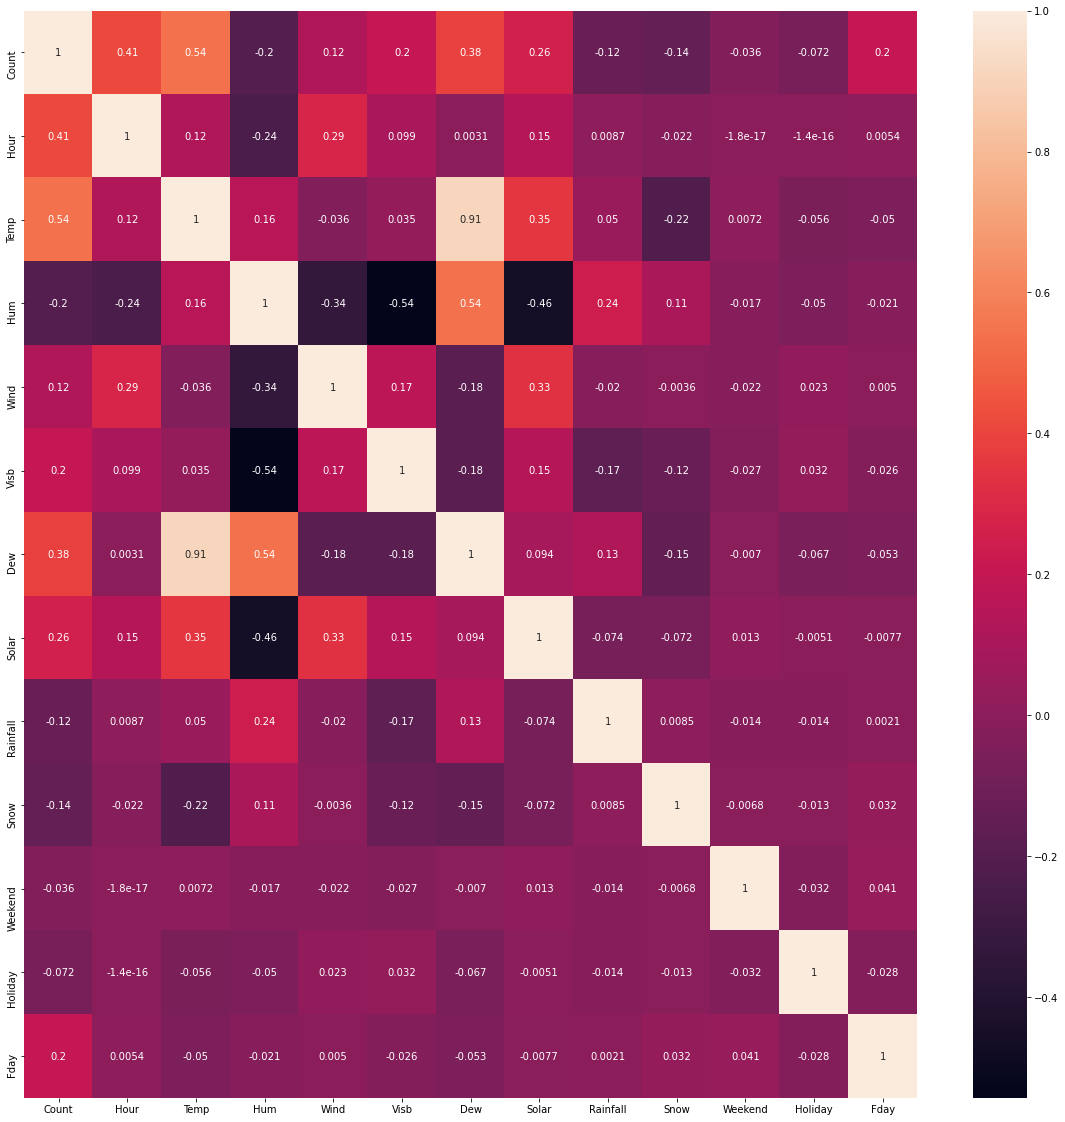

In [84]:
import seaborn as sn
import matplotlib.pyplot as plt
def show_heatmap():
    #variables for reshaping seaborn heatmap 
    fig_dims = (20, 20)
    fig, ax = plt.subplots(figsize=fig_dims)

    corr = df.corr()

    sn.heatmap(corr, annot=True, ax=ax)
    plt.show()
show_heatmap()

In [85]:
df_encoded = pd.get_dummies(df, dtype="bool")
df_encoded.drop(["Dew"],axis=1, inplace=True) # High correlation with temp
df_encoded.drop(["Solar"],axis=1, inplace=True) # no need

In [86]:
df_encoded.dtypes

Count                int64
Hour                 int64
Temp               float64
Hum                  int64
Wind               float64
Visb                 int64
Rainfall           float64
Snow               float64
Weekend               bool
Holiday               bool
Fday                  bool
DWeek_Friday          bool
DWeek_Monday          bool
DWeek_Saturday        bool
DWeek_Sunday          bool
DWeek_Thursday        bool
DWeek_Tuesday         bool
DWeek_Wednesday       bool
Seasons_Autumn        bool
Seasons_Spring        bool
Seasons_Summer        bool
Seasons_Winter        bool
dtype: object

In [87]:
df_encoded.to_csv("./datasets/bike_data.csv")

In [88]:
df = df_encoded.copy()
df

,Count,Hour,Temp,Hum,Wind,Visb,Rainfall,Snow,Weekend,Holiday,...,DWeek_Monday,DWeek_Saturday,DWeek_Sunday,DWeek_Thursday,DWeek_Tuesday,DWeek_Wednesday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254,0,-5.2,37,2.2,2000,0.0,0.0,False,False,...,False,False,False,False,False,False,False,False,False,True
1,204,1,-5.5,38,0.8,2000,0.0,0.0,False,False,...,False,False,False,False,False,False,False,False,False,True
2,173,2,-6.0,39,1.0,2000,0.0,0.0,False,False,...,False,False,False,False,False,False,False,False,False,True
3,107,3,-6.2,40,0.9,2000,0.0,0.0,False,False,...,False,False,False,False,False,False,False,False,False,True
4,78,4,-6.0,36,2.3,2000,0.0,0.0,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,False,False,...,False,False,False,False,False,False,True,False,False,False
8756,764,20,3.4,37,2.3,2000,0.0,0.0,False,False,...,False,False,False,False,False,False,True,False,False,False
8757,694,21,2.6,39,0.3,1968,0.0,0.0,False,False,...,False,False,False,False,False,False,True,False,False,False
8758,712,22,2.1,41,1.0,1859,0.0,0.0,False,False,...,False,False,False,False,False,False,True,False,False,False


## Setup Train and Test

In [89]:
from sklearn.model_selection import train_test_split

X = df.drop("Count", axis=1).values
y = df["Count"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_PERCENTAGE, random_state=42)

## Normalize

In [90]:
from joblib import dump, load
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
# Save MMS for later use
dump(scaler, './models/min_max_scaler.joblib') 

X_test = scaler.transform(X_test)

In [91]:
train_df = pd.DataFrame(X_train, columns=df.drop("Count",axis=1).columns)
test_df = pd.DataFrame(X_test, columns=df.drop("Count",axis=1).columns)

# Reset indices for data
train_df.reset_index(inplace=True, drop=True)
test_df.reset_index(inplace=True, drop=True)

# Reset indices for dependent var
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)


train_df["Count"] = y_train
test_df["Count"] = y_test

In [92]:
train_df

,Hour,Temp,Hum,Wind,Visb,Rainfall,Snow,Weekend,Holiday,Fday,...,DWeek_Saturday,DWeek_Sunday,DWeek_Thursday,DWeek_Tuesday,DWeek_Wednesday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Count
0,0.173913,0.113274,0.510204,0.162162,0.992883,0.000000,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,33
1,0.869565,0.207080,0.448980,0.283784,0.996950,0.000000,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,218
2,0.347826,0.511504,0.673469,0.108108,0.995425,0.000000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
3,0.913043,0.269027,0.387755,0.310811,1.000000,0.000000,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,133
4,0.695652,0.647788,0.551020,0.432432,0.258770,0.000000,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6127,0.956522,0.838938,0.755102,0.270270,0.593798,0.000000,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1507
6128,0.304348,0.725664,0.918367,0.067568,0.209456,0.020833,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,828
6129,0.608696,0.831858,0.632653,0.364865,0.970005,0.000000,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,999
6130,0.869565,0.249558,0.520408,0.148649,0.690391,0.000000,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,322


In [93]:
test_df

,Hour,Temp,Hum,Wind,Visb,Rainfall,Snow,Weekend,Holiday,Fday,...,DWeek_Saturday,DWeek_Sunday,DWeek_Thursday,DWeek_Tuesday,DWeek_Wednesday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Count
0,0.347826,0.791150,0.704082,0.243243,0.999492,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1728
1,0.521739,0.886726,0.520408,0.283784,0.389934,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,822
2,0.608696,0.911504,0.510204,0.162162,0.869853,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,658
3,0.782609,0.608850,0.479592,0.189189,0.815455,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2716
4,0.304348,0.423009,0.520408,0.135135,0.693950,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2623,0.869565,0.647788,0.183673,0.162162,1.000000,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1581
2624,0.695652,0.400000,0.163265,0.243243,0.998983,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,404
2625,0.869565,0.532743,0.479592,0.432432,0.966955,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1401
2626,1.000000,0.292035,0.561224,0.256757,1.000000,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,169


In [94]:
train_df.to_csv("./datasets/bike_train.csv")

In [95]:
test_df.to_csv("./datasets/bike_test.csv")

In [96]:
train_df = pd.read_csv("./datasets/bike_train.csv",index_col=0)
test_df = pd.read_csv("./datasets/bike_test.csv",index_col=0)

In [97]:
bike_data_normalized = train_df.append(test_df)
bike_data_normalized.reset_index(inplace=True, drop=True)
bike_data_normalized

,Hour,Temp,Hum,Wind,Visb,Rainfall,Snow,Weekend,Holiday,Fday,...,DWeek_Saturday,DWeek_Sunday,DWeek_Thursday,DWeek_Tuesday,DWeek_Wednesday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Count
0,0.173913,0.113274,0.510204,0.162162,0.992883,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,33
1,0.869565,0.207080,0.448980,0.283784,0.996950,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,218
2,0.347826,0.511504,0.673469,0.108108,0.995425,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
3,0.913043,0.269027,0.387755,0.310811,1.000000,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,133
4,0.695652,0.647788,0.551020,0.432432,0.258770,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0.869565,0.647788,0.183673,0.162162,1.000000,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1581
8756,0.695652,0.400000,0.163265,0.243243,0.998983,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,404
8757,0.869565,0.532743,0.479592,0.432432,0.966955,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1401
8758,1.000000,0.292035,0.561224,0.256757,1.000000,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,169


In [98]:
bike_data_normalized.to_csv("./datasets/bike_data_normalized.csv")

In [103]:
bike_data_normalized.columns

Index(['Hour', 'Temp', 'Hum', 'Wind', 'Visb', 'Rainfall', 'Snow', 'Weekend',
       'Holiday', 'Fday', 'DWeek_Friday', 'DWeek_Monday', 'DWeek_Saturday',
       'DWeek_Sunday', 'DWeek_Thursday', 'DWeek_Tuesday', 'DWeek_Wednesday',
       'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Count'],
      dtype='object')